In [96]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
%matplotlib widget

N = 3 # Number of nodes
num_steps = 100 # steps
dt = 0.02

# Initialize nodes 
x = np.zeros((num_steps + 1, N))
y = np.zeros((num_steps + 1, N))
vx = np.zeros((num_steps + 1, N))
vy = np.zeros((num_steps + 1, N))

Fx = np.zeros((num_steps + 1, N))
Fy = np.zeros((num_steps + 1, N))

m = np.zeros(N)+10 #mass 

# Initialize springs 
Nspring = 5
k0 = 1

Node1 = np.random.randint(0,N,size=Nspring)
Node2 = np.random.randint(0,N,size=Nspring)
F_mat = np.zeros((num_steps,N,N))
k = np.zeros(Nspring)+k0

# K matrix
k_matrix = np.zeros((N, N))
k_matrix[Node1, Node2] = k
k_matrix[Node2, Node1] = k 

### Arbitrary method for L_0 dfetermination
x[0,:] = np.random.uniform(-10,10,size=N)
y[0,:] = np.random.uniform(-10,10,size=N)

x0= x[0,:]
y0= y[0,:]

dx0 = x0[:, np.newaxis] - x0[np.newaxis, :]
dy0 = y0[:, np.newaxis] - y0[np.newaxis, :]

distance = np.sqrt(dx0**2 + dy0**2)
angle = np.arctan2(dy0,dx0)

L0_matrix = np.zeros((N, N))
L0_matrix[Node2, Node1] = distance[Node2,Node1]/1
L0_matrix[Node1, Node2] = distance[Node2,Node2]/1

In [99]:
# Iteration 
for i in range(num_steps):

    # Distance calculation
    x0= x[i,:]
    y0= y[i,:]

    dx0 = x0[:, np.newaxis] - x0[np.newaxis, :]
    dy0 = y0[:, np.newaxis] - y0[np.newaxis, :]

    distance = np.sqrt(dx0**2 + dy0**2)

    
    # Force
    Fr = -k_matrix*(distance-L0_matrix)
    F_mat[i,:,:]=Fr*1+0
    Fx_m = Fr*np.cos(angle)
    Fy_m = Fr*np.sin(angle)

    Fx[i,:] = np.sum(Fx_m, axis=1)
    Fy[i,:] = np.sum(Fy_m, axis=1)

    ax = Fx[i,:]/m
    ay = Fy[i,:]/m

    vx[i+1,:] = vx[i,:] + ax*dt
    vy[i+1,:] = vy[i,:] + ay*dt
    x [i+1,:] = x [i,:] + vx[i,:]*dt
    y [i+1,:] = y [i,:] + vy[i,:]*dt


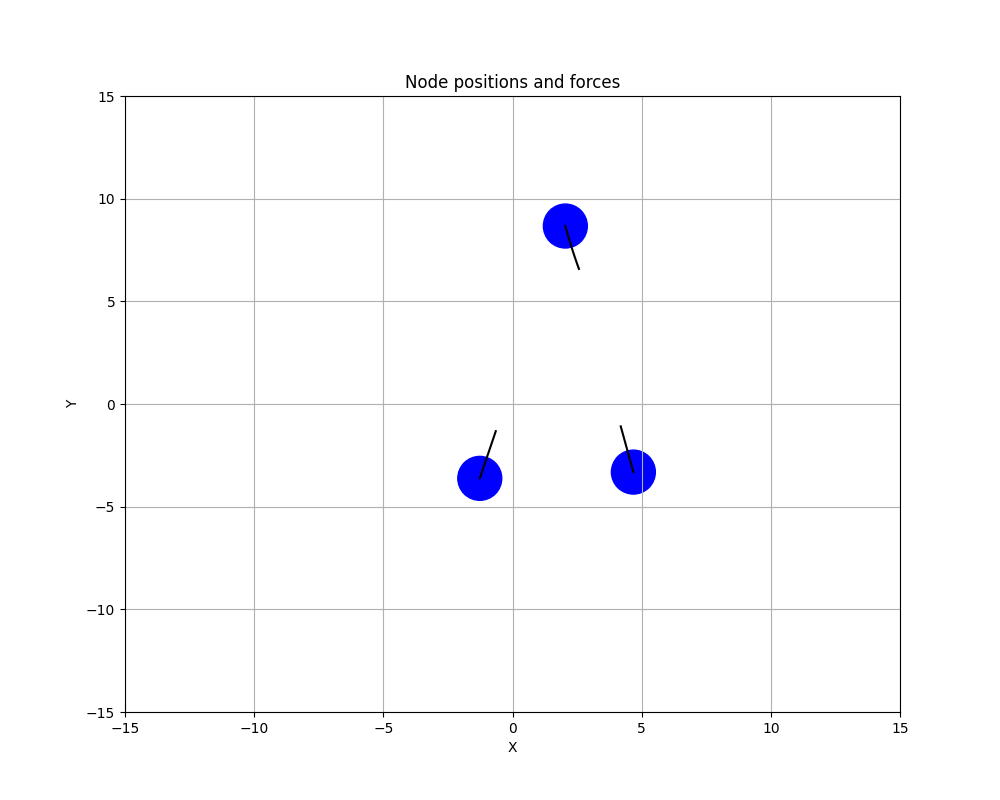

In [100]:
# Plot
plt.figure(figsize=(10, 8))
plt.scatter(x[0,:], y[0,:], s=m*100, c='blue')  # Nodes

# Add node indices
for i in range(N):
    #plt.text(x0[i], y0[i], str(i), fontsize=12, ha='right')
    plt.plot(x[:,i],y[:,i],c='k')



# Add elementary forces (black quiver)
##for i in range(N):
#   for j in range(N):
#        if k_matrix[i, j] != 0:
#            plt.quiver(x0[i], y0[i], Fx[i, j], Fy[i, j], angles='xy', scale_units='xy', color='black', width=0.002)

# Add sum of forces (red quiver)
#plt.quiver(x0, y0, Fx_sum, Fy_sum, angles='xy', scale_units='xy', color='red', width=0.005)

plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Node positions and forces')
plt.grid()
plt.show()